In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os 

In [2]:
# Data Exploration and Understanding:
# - Load and examine the dataset's structure and relationships between tables.
# - Identify key tables: orders, customers, products, sellers, payments, reviews, geolocation.
# - Assess data quality, missing values, and time coverage.


In [3]:
customers = pd.read_csv('datasets/olist_customers_dataset.csv')
geolocation = pd.read_csv('datasets/olist_geolocation_dataset.csv')
order_items = pd.read_csv('datasets/olist_order_items_dataset.csv')
order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')
orders = pd.read_csv('datasets/olist_orders_dataset.csv')
products = pd.read_csv('datasets/olist_products_dataset.csv')
sellers = pd.read_csv('datasets/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('datasets/product_category_name_translation.csv')

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) 
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [5]:
def plotCorrelationMatrix(df, graphWidth, filename="DataFrame"):
    df = df.dropna(axis=1) 
    df = df[[col for col in df if df[col].nunique() > 1]]  
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
### 1. Customers dataset

In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
customers.shape

(99441, 5)

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
customers.duplicated().sum()

0

In [13]:
### 2. Geolocation

In [14]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
geolocation.shape

(1000163, 5)

In [16]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
### 3. Order items

In [19]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [20]:
order_items.shape

(112650, 7)

In [21]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
### 4. Order Payments

In [23]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
order_payments.shape

(103886, 5)

In [25]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
### 5. Orders

In [28]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
orders.shape

(99441, 8)

In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
### 6. Orders Review

In [33]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [36]:

# Merge datasets to create a master dataframe
df = orders.merge(order_items, on='order_id', how='inner') \
           .merge(order_payments, on='order_id', how='inner') \
           .merge(order_reviews, on='order_id', how='left') \
           .merge(customers, on='customer_id', how='inner') \
           .merge(products, on='product_id', how='inner') \
           .merge(product_category_name_translation, on='product_category_name', how='left') \
           .merge(sellers, on='seller_id', how='inner')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days


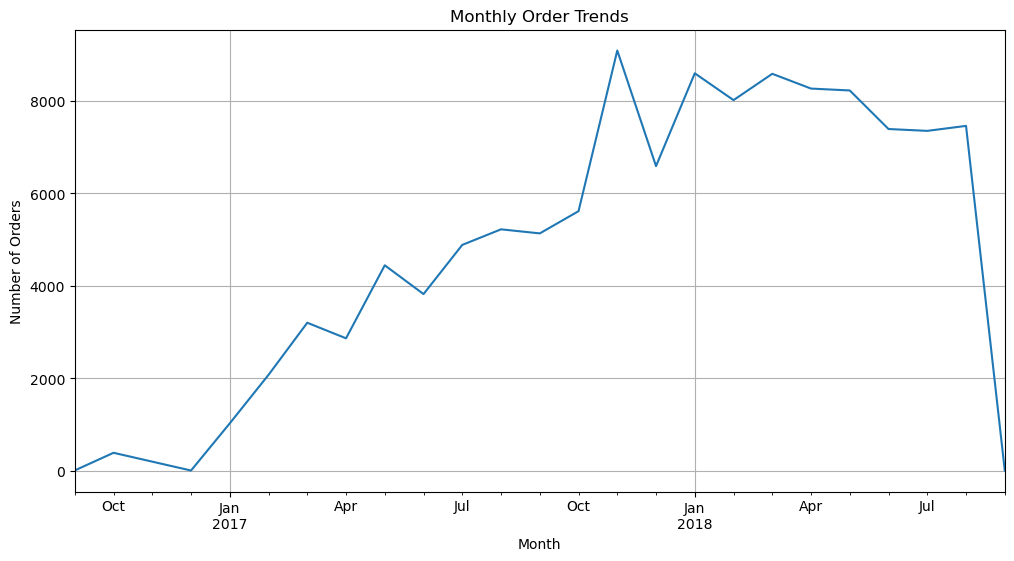

In [37]:

# Monthly sales trends
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = df.groupby('month').size()
monthly_sales.plot(kind='line', figsize=(12, 6), title='Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


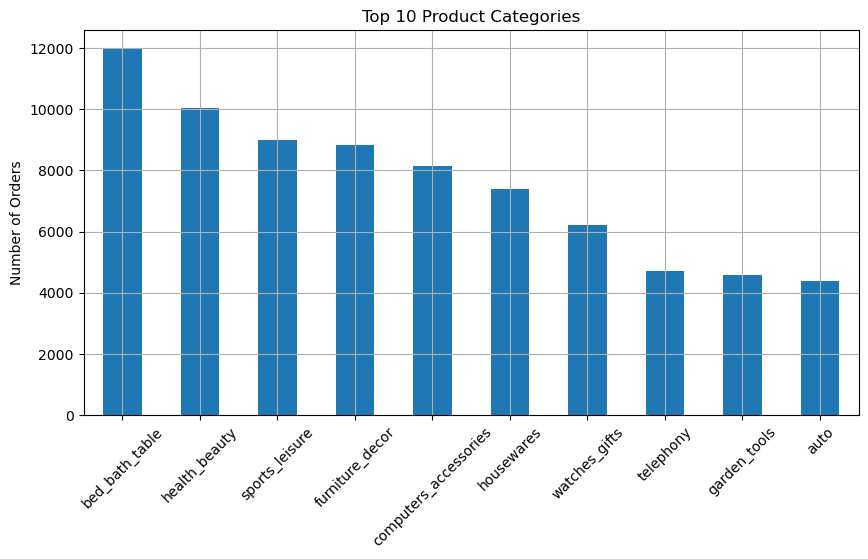

In [38]:

# Top product categories
top_categories = df['product_category_name_english'].value_counts().head(10)
top_categories.plot(kind='bar', figsize=(10, 5), title='Top 10 Product Categories')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


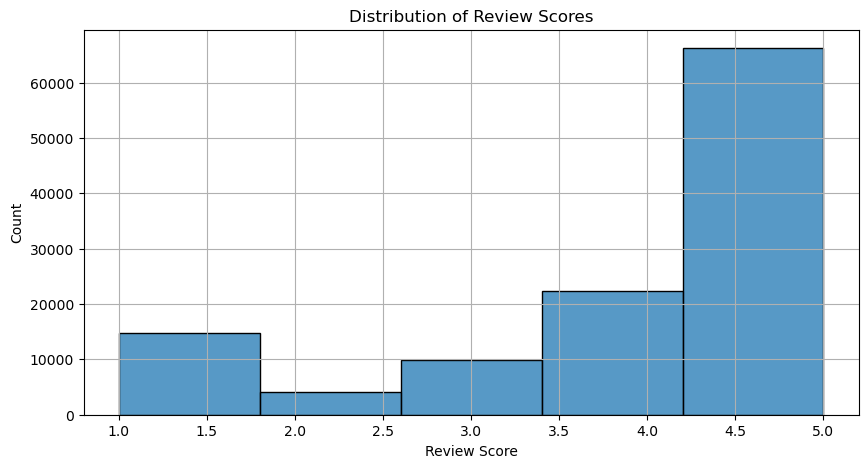

In [39]:

# Review score distribution
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['review_score'].dropna(), bins=5, kde=False)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()


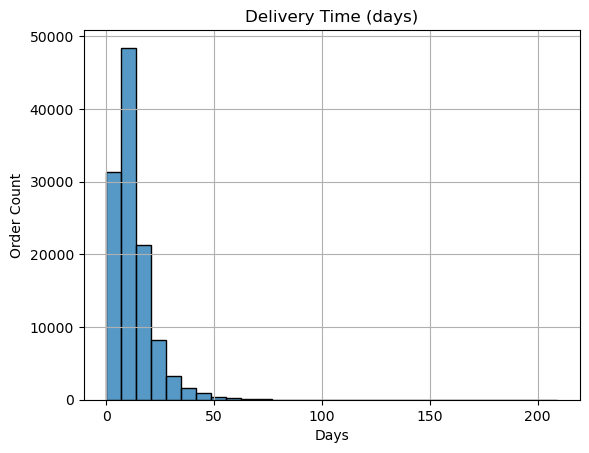

In [40]:

# Delivery time distribution
sns.histplot(df['delivery_time'].dropna(), bins=30)
plt.title('Delivery Time (days)')
plt.xlabel('Days')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()


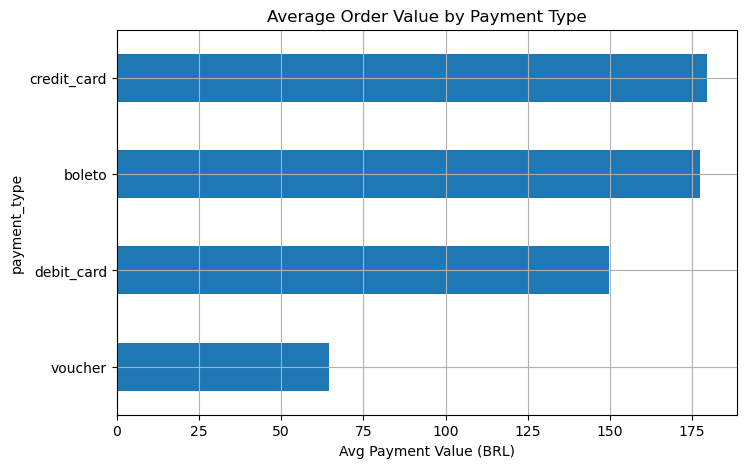

In [41]:

# Payment method impact
payment_avg = df.groupby('payment_type')['payment_value'].mean().sort_values()
payment_avg.plot(kind='barh', figsize=(8, 5), title='Average Order Value by Payment Type')
plt.xlabel('Avg Payment Value (BRL)')
plt.grid(True)
plt.show()


In [42]:
df.to_csv('master_dataset.csv', index=False)

In [43]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                           978
review_score                        978
review_comment_title             104415
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
customer_unique_id                    0


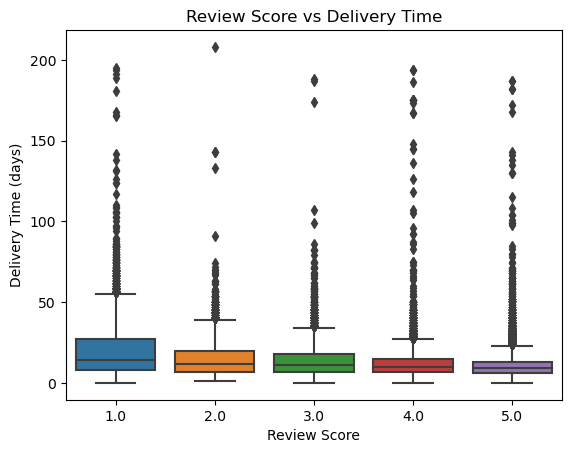

In [44]:
# Analyze review scores against delivery times
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='review_score', y='delivery_time')
plt.title('Review Score vs Delivery Time')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.show()


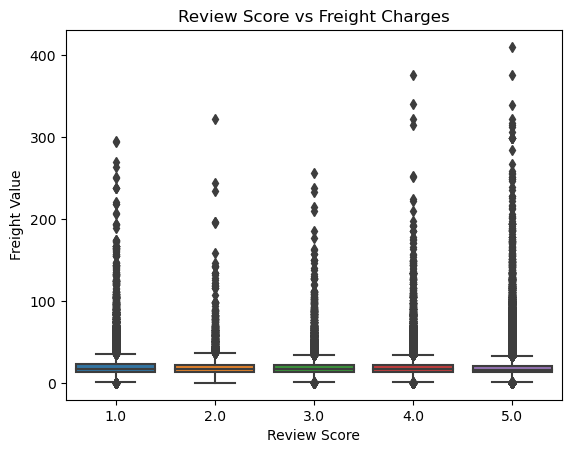

In [45]:
# Check correlation between freight value and review score
sns.boxplot(data=df, x='review_score', y='freight_value')
plt.title('Review Score vs Freight Charges')
plt.xlabel('Review Score')
plt.ylabel('Freight Value')
plt.show()


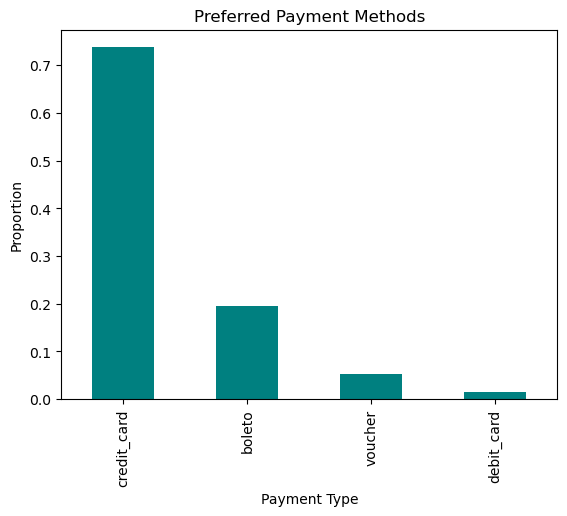

In [46]:
# Payment methods performance
df['payment_type'].value_counts(normalize=True).plot(kind='bar', color='teal')
plt.title('Preferred Payment Methods')
plt.ylabel('Proportion')
plt.xlabel('Payment Type')
plt.show()


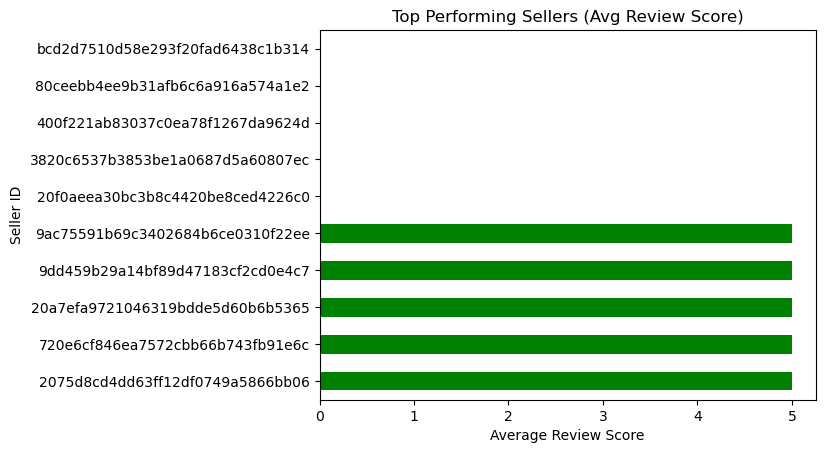

In [47]:
# Seller performance
seller_reviews = df.groupby('seller_id')['review_score'].mean().sort_values()
top_sellers = seller_reviews.tail(10)

top_sellers.plot(kind='barh', color='green')
plt.title('Top Performing Sellers (Avg Review Score)')
plt.xlabel('Average Review Score')
plt.ylabel('Seller ID')
plt.show()


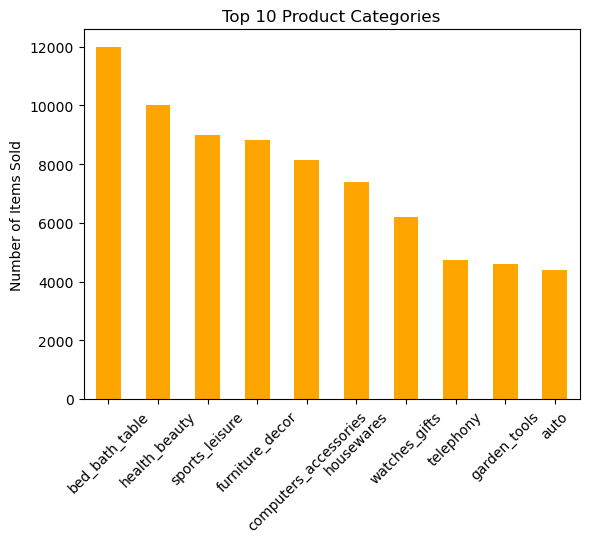

In [48]:
# Popular product categories
df['product_category_name_english'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Product Categories')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.show()


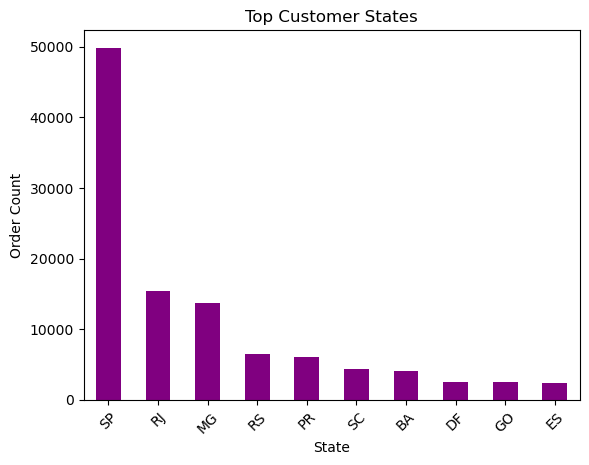

In [49]:
# Geographic sales trends
top_states = df['customer_state'].value_counts().head(10)
top_states.plot(kind='bar', color='purple')
plt.title('Top Customer States')
plt.ylabel('Order Count')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


# 1. Customer Segmentation using K-Means
🎯 Goal:
Cluster customers into groups based on behavior like:
- Average order value
- Number of orders
- Review scores
- Product categories purchased
- Geographic region (optional)

✅ Use Case:
- Target marketing campaigns (e.g., premium vs budget users)
- Recommend personalized offers
- Create loyalty programs based on user type

c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\swaga\anaconda3\lib\site-packages\sklearn\clust

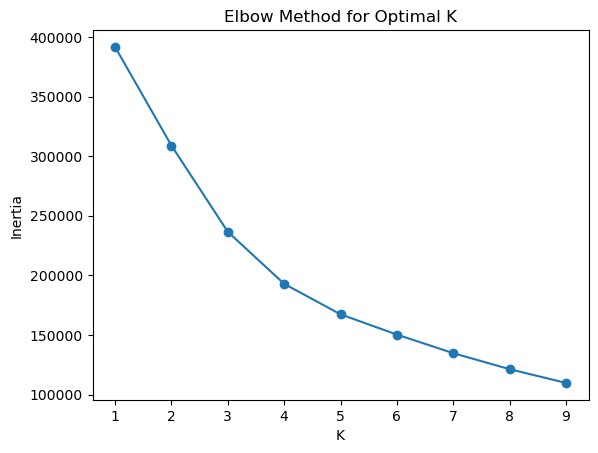

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

customer_group = df.groupby('customer_id').agg({
    'payment_value': 'mean',
    'order_id': 'count',
    'review_score': 'mean',
    'freight_value': 'mean'
}).rename(columns={'order_id': 'num_orders'})

customer_group.dropna(inplace=True)

scaler = StandardScaler()
scaled = scaler.fit_transform(customer_group)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


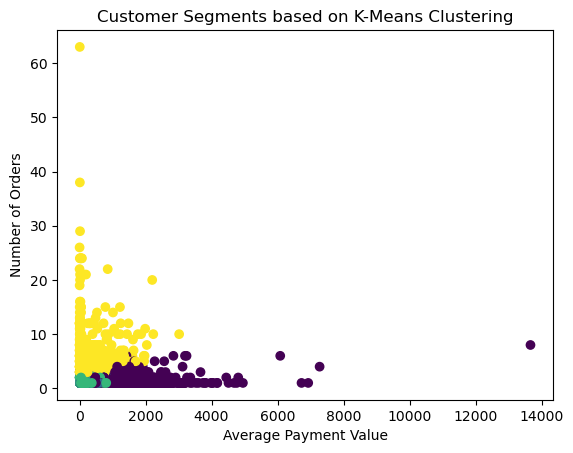

In [51]:
# K-Means with optimal K=4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_group['cluster'] = kmeans.fit_predict(scaled)

plt.scatter(customer_group['payment_value'], customer_group['num_orders'], c=customer_group['cluster'], cmap='viridis')
plt.xlabel('Average Payment Value')
plt.ylabel('Number of Orders')
plt.title('Customer Segments based on K-Means Clustering')
plt.show()


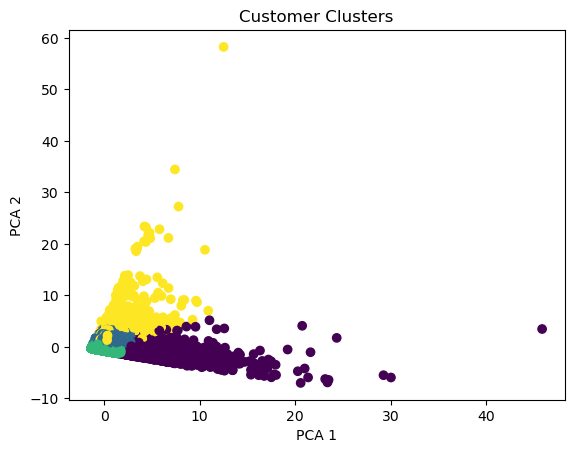

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

plt.scatter(components[:,0], components[:,1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [53]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


In [54]:
# %pip install xgboost

In [ ]:
# model_training.py
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # type: ignore
import joblib
from datetime import datetime
import os

os.makedirs("models", exist_ok=True)

master_df = pd.read_csv('master_dataset.csv')

master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])

latest_date = master_df['order_purchase_timestamp'].max()
last_order_df = master_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
last_order_df['days_since_last_order'] = (latest_date - last_order_df['order_purchase_timestamp']).dt.days

order_count_df = master_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
order_count_df.columns = ['customer_unique_id', 'order_count']

avg_payment_df = master_df.groupby('customer_unique_id')['payment_value'].mean().reset_index()
avg_payment_df.columns = ['customer_unique_id', 'avg_payment_value']

avg_freight_df = master_df.groupby('customer_unique_id')['freight_value'].mean().reset_index()
avg_freight_df.columns = ['customer_unique_id', 'freight_value']

avg_review_df = master_df.groupby('customer_unique_id')['review_score'].mean().reset_index()
avg_review_df.columns = ['customer_unique_id', 'review_score']

features_df = order_count_df \
    .merge(avg_payment_df, on='customer_unique_id') \
    .merge(avg_freight_df, on='customer_unique_id') \
    .merge(avg_review_df, on='customer_unique_id') \
    .merge(last_order_df[['customer_unique_id', 'days_since_last_order']], on='customer_unique_id')

features_df['churn'] = np.where(
    (features_df['days_since_last_order'] > 180) | (features_df['review_score'] <= 2), 1, 0
)



In [ ]:
# CHURN PREDICTION MODEL 
churn_features = ['order_count', 'review_score', 'avg_payment_value', 'freight_value', 'days_since_last_order']
churn_df = features_df.dropna(subset=churn_features + ['churn'])

X_churn = churn_df[churn_features]
y_churn = churn_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

churn_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
churn_model.fit(X_train, y_train)

joblib.dump(churn_model, 'models/churn_model.pkl')




c:\Users\swaga\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['models/churn_model.pkl']

In [ ]:
# CUSTOMER SEGMENTATION MODEL 
segment_df = features_df.dropna(subset=churn_features[:-1]) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(segment_df[churn_features[:-1]])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

segment_df['cluster'] = kmeans.labels_

joblib.dump(kmeans, 'models/segment_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')


c:\Users\swaga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\swaga\AppData\Local\Temp\ipykernel_12940\1981794303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['cluster'] = kmeans.labels_


['models/scaler.pkl']

In [ ]:
# CONTENT-BASED PRODUCT RECOMMENDER 

products_df = pd.read_csv('datasets/olist_products_dataset.csv')
order_items = pd.read_csv('datasets/olist_order_items_dataset.csv')
translation_df = pd.read_csv('datasets/product_category_name_translation.csv')

products_df = products_df.merge(translation_df, on='product_category_name', how='left')

products_df = products_df.merge(order_items[['product_id', 'price']], on='product_id', how='left')

product_features = products_df[['product_category_name_english', 'price']].dropna()

product_features_encoded = pd.get_dummies(product_features['product_category_name_english'])

product_features_encoded['price'] = product_features['price'].values

product_scaler = StandardScaler()
X_prod_scaled = product_scaler.fit_transform(product_features_encoded)

joblib.dump(X_prod_scaled, 'models/product_features.npy')
joblib.dump(product_scaler, 'models/product_scaler.pkl')
joblib.dump(products_df, 'models/products_df.pkl')


['models/products_df.pkl']

In [59]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

products_df = pd.read_csv('datasets/olist_products_dataset.csv')
translation_df = pd.read_csv('datasets/product_category_name_translation.csv')
order_items_df = pd.read_csv('datasets/olist_order_items_dataset.csv')

products_df = products_df.merge(translation_df, on='product_category_name', how='left')

merged = products_df.merge(order_items_df[['product_id', 'price']], on='product_id', how='left')
merged = merged[['product_id', 'product_category_name_english', 'price']].dropna()

product_features = pd.get_dummies(merged['product_category_name_english'])
product_features['price'] = merged['price'].values

product_scaler = StandardScaler()
X_prod_scaled = product_scaler.fit_transform(product_features)

joblib.dump(X_prod_scaled, 'models/product_features.npy')
joblib.dump(product_scaler, 'models/product_scaler.pkl')
joblib.dump(merged, 'models/products_df.pkl')


['models/products_df.pkl']

In [60]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

products_df = joblib.load('models/products_df.pkl')

products_df = products_df.drop_duplicates(subset='product_id').reset_index(drop=True)

encoded_df = pd.get_dummies(products_df['product_category_name_english'])
encoded_df['price'] = products_df['price'].values

scaler = StandardScaler()
product_features = scaler.fit_transform(encoded_df)

joblib.dump(encoded_df, 'models/encoded_df.pkl')
joblib.dump(scaler, 'models/product_scaler.pkl')
np.save('models/product_features.npy', product_features)

print("✅ Product features regenerated with aligned data!")


✅ Product features regenerated with aligned data!
